In [1]:
from scipy.integrate import ode
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, initializers
from sklearn.preprocessing import MinMaxScaler
from time import time
from os import path

In [2]:
from tensorflow.keras.layers import Dense, Dropout

#Ustvarimo funkcijo, ki vrača kompajlan model
def create_model(activation='sigmoid', optimizer='adam'):
    
    model = tf.keras.models.Sequential()
    model.add(Dense(3, input_dim=3, activation=activation))
    model.add(Dense(81, activation=activation))
    #model.add(Dropout(0.2))
    model.add(Dense(81, activation=activation))
    #model.add(Dropout(0.2))
    model.add(Dense(81, activation=activation))
    #model.add(Dropout(0.2))
    model.add(Dense(81, activation=activation))
    #model.add(Dropout(0.2))
    model.add(Dense(3, activation='sigmoid'))

    model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mae'])

    return model

In [3]:
from sklearn.model_selection import KFold

In [4]:
if(path.exists("data/data-2.npy") != 1):
    print("Generating data.")
    n = int(tmax/dt) + 1
    data = np.zeros((n, 3))

    i = 0
    start = time()
    while t < tmax:
        y_ATM = solver_ATM.integrate(t+dt)
        #y0_MOD = solver_MOD.integrate(t+dt)
        data[i, :] = y_ATM[:]
        i = i + 1
        t += dt
    print("Elasped time: %0.3g s" %(time()-start))
    data = data[1000:] # only use data from the attractor (after time = 10000 * dt)
    print("Integration finished.")
    np.save("data/data-2.npy", data)
    
else:
    print("Data exist.")
    data = np.load("data/data-2.npy")
    print("Data loaded.")
    
#PREPROCESS DATA
x_train = data[:-1,:]
y_train = data[1:, :] - data[:-1, :]

x_scaler=MinMaxScaler()
y_scaler=MinMaxScaler()

x_scaler.fit(x_train)
y_scaler.fit(y_train)

x_train_norm=x_scaler.transform(x_train)
y_train_norm=y_scaler.transform(y_train)

xy_train_norm=np.concatenate((x_train_norm,y_train_norm), axis=1)

new_order=np.random.choice(range(x_train.shape[0]),x_train.shape[0],replace=False)
x_train_norm=x_train_norm[new_order]
y_train_norm=y_train_norm[new_order]

Data exist.
Data loaded.


In [13]:
X = x_train_norm
Y = y_train_norm

num_folds = 3 # dolocimo st. foldov
kf = KFold(n_splits=num_folds, shuffle=True) # razred za razdelitev podatkov

fold_no = 1
scores_per_fold = []
verbose=2
losses = []

# ce nasa Loss ne vec pade se ustavi minimizacija
callback = tf.keras.callbacks.EarlyStopping(monitor='mae', patience=20, verbose=0, mode='min') 
#ce dosezemo plato zmanjsamo korak ucenja
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='mae', factor=0.9, patience=5, min_lr=0.0001)

    
for train, test in kf.split(X[:len(X)], Y[:len(Y)]): #zanka cez vse usne ter testne sete
    modelCV = create_model()
    start=time()
    history = modelCV.fit(X[train], Y[train], epochs=100, batch_size=1024, verbose=verbose,
                          callbacks=[callback,reduce_lr])
    print("Trained in %0.3g" %(time()-start))
    # na fitanem modelu izvrednotimo mere uspesnosti
    # mere uspesnosti bi lahko spremljali ze tekom ucenja, znotraj metode fit
    scores = modelCV.evaluate(X[test], Y[test], verbose=verbose)
    print(f'Score per fold {fold_no}: {modelCV.metrics_names} of {scores}')
    scores_per_fold.append(scores)
    
    losses.append(history.history['loss'])
    fold_no += 1

Epoch 1/100
651/651 - 2s - loss: 0.0369 - mae: 0.0369
Epoch 2/100
651/651 - 2s - loss: 0.0323 - mae: 0.0323
Epoch 3/100
651/651 - 2s - loss: 0.0285 - mae: 0.0285
Epoch 4/100
651/651 - 2s - loss: 0.0222 - mae: 0.0222
Epoch 5/100
651/651 - 2s - loss: 0.0208 - mae: 0.0208
Epoch 6/100
651/651 - 2s - loss: 0.0180 - mae: 0.0180
Epoch 7/100
651/651 - 2s - loss: 0.0117 - mae: 0.0117
Epoch 8/100
651/651 - 2s - loss: 0.0086 - mae: 0.0086
Epoch 9/100
651/651 - 2s - loss: 0.0076 - mae: 0.0076
Epoch 10/100
651/651 - 2s - loss: 0.0067 - mae: 0.0067
Epoch 11/100
651/651 - 2s - loss: 0.0061 - mae: 0.0061
Epoch 12/100
651/651 - 2s - loss: 0.0057 - mae: 0.0057
Epoch 13/100
651/651 - 2s - loss: 0.0053 - mae: 0.0053
Epoch 14/100
651/651 - 2s - loss: 0.0050 - mae: 0.0050
Epoch 15/100
651/651 - 2s - loss: 0.0047 - mae: 0.0047
Epoch 16/100
651/651 - 2s - loss: 0.0044 - mae: 0.0044
Epoch 17/100
651/651 - 2s - loss: 0.0042 - mae: 0.0042
Epoch 18/100
651/651 - 2s - loss: 0.0040 - mae: 0.0040
Epoch 19/100
651/65

Epoch 48/100
651/651 - 3s - loss: 0.0017 - mae: 0.0017
Epoch 49/100
651/651 - 3s - loss: 0.0016 - mae: 0.0016
Epoch 50/100
651/651 - 2s - loss: 0.0015 - mae: 0.0015
Epoch 51/100
651/651 - 2s - loss: 0.0017 - mae: 0.0017
Epoch 52/100
651/651 - 2s - loss: 0.0015 - mae: 0.0015
Epoch 53/100
651/651 - 2s - loss: 0.0017 - mae: 0.0017
Epoch 54/100
651/651 - 2s - loss: 0.0015 - mae: 0.0015
Epoch 55/100
651/651 - 2s - loss: 0.0016 - mae: 0.0016
Epoch 56/100
651/651 - 3s - loss: 0.0013 - mae: 0.0013
Epoch 57/100
651/651 - 2s - loss: 0.0013 - mae: 0.0013
Epoch 58/100
651/651 - 2s - loss: 0.0013 - mae: 0.0013
Epoch 59/100
651/651 - 2s - loss: 0.0013 - mae: 0.0013
Epoch 60/100
651/651 - 2s - loss: 0.0013 - mae: 0.0013
Epoch 61/100
651/651 - 2s - loss: 0.0013 - mae: 0.0013
Epoch 62/100
651/651 - 3s - loss: 0.0012 - mae: 0.0012
Epoch 63/100
651/651 - 3s - loss: 0.0012 - mae: 0.0012
Epoch 64/100
651/651 - 2s - loss: 0.0011 - mae: 0.0011
Epoch 65/100
651/651 - 2s - loss: 0.0011 - mae: 0.0011
Epoch 66/1

Epoch 90/100
651/651 - 2s - loss: 0.0024 - mae: 0.0024
Epoch 91/100
651/651 - 2s - loss: 0.0028 - mae: 0.0028
Epoch 92/100
651/651 - 2s - loss: 0.0025 - mae: 0.0025
Epoch 93/100
651/651 - 2s - loss: 0.0020 - mae: 0.0020
Epoch 94/100
651/651 - 2s - loss: 0.0024 - mae: 0.0024
Epoch 95/100
651/651 - 2s - loss: 0.0024 - mae: 0.0024
Epoch 96/100
651/651 - 2s - loss: 0.0022 - mae: 0.0022
Epoch 97/100
651/651 - 2s - loss: 0.0022 - mae: 0.0022
Epoch 98/100
651/651 - 2s - loss: 0.0021 - mae: 0.0021
Epoch 99/100
651/651 - 2s - loss: 0.0020 - mae: 0.0020
Epoch 100/100
651/651 - 2s - loss: 0.0020 - mae: 0.0020
Trained in 226
10407/10407 - 7s - loss: 0.0016 - mae: 0.0016
Score per fold 3: ['loss', 'mae'] of [0.001586086000315845, 0.001586086000315845]


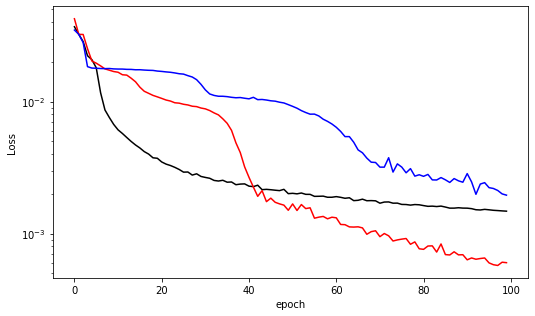

In [23]:
plt.figure(figsize=(7.5, 4.5))
colors=['k','r','b']
for i in range(3):
    plt.plot(losses[i][:], c=colors[i])

plt.xlabel('epoch')
plt.ylabel('Loss')
plt.tight_layout()
#plt.ylim([0, 0.005])
plt.yscale('log')
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor # Wrapper za Keras model v sklearn

modelGS = KerasRegressor(build_fn=create_model, verbose=0) #ustvarimo model
#veljavni argumenti so argumenti funkcije create_model ter metode fit za Keras model

# najprej dolocimo optimalen batch_size ter stevilo epoh
# uspesnot modela ovrednotimo na vseh kombinacijah parametrov
batch_size = [100] # vrednosti, ki jih preverimo
epochs = [1024, 512]
activation=['relu', 'sigmoid']
optimizer = ['adam', 'RMSprop']

# ustvarimo slovar kjer so kljuci imena parametrov
param_grid = dict(optimizer=optimizer, activation=activation, batch_size=batch_size, epochs=epochs)

#ustvarimo objekt z iskanje na mrezi
# specificiramo katero mero uspesnosti gledamo, default je loss funkcija
grid = GridSearchCV(estimator=modelGS, param_grid=param_grid, n_jobs=-1, cv=3, scoring='neg_mean_squared_error')


In [ ]:
grid.fit(X[:len(X)], Y[:len(X)])

In [ ]:
print("Best: %f using %s" %(grid.best_score_, grid.best_params_))
# pogledamo se rezultate v ostalih tockah
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with : %r' %(mean, stdev, param))